### Transmission curves


Andressa Wille 


andressaw2@gmail.com


08/2025

##### This is a tutorial for some plots involving HST and JWST transmission curves, galaxy spectrum and emission lines.

See https://svo2.cab.inta-csic.es/theory/fps/index.php?mode=browse&gname=JWST&asttype= and select the instrument and filters you want to download. Download the ascii file for each filter. Save the .dat files in a directory.

Follow the examples.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import glob
import pandas as pd

##### 1) This is an example to plot transmission curves of JWST filters and a spectrum:

In [2]:
# Function to calculate the central wavelength of a filter
def wave_center(file):
    data = np.loadtxt(file)
    wavelength = data[:, 0] 
    transmission = data[:, 1]
    return np.average(wavelength, weights=transmission)

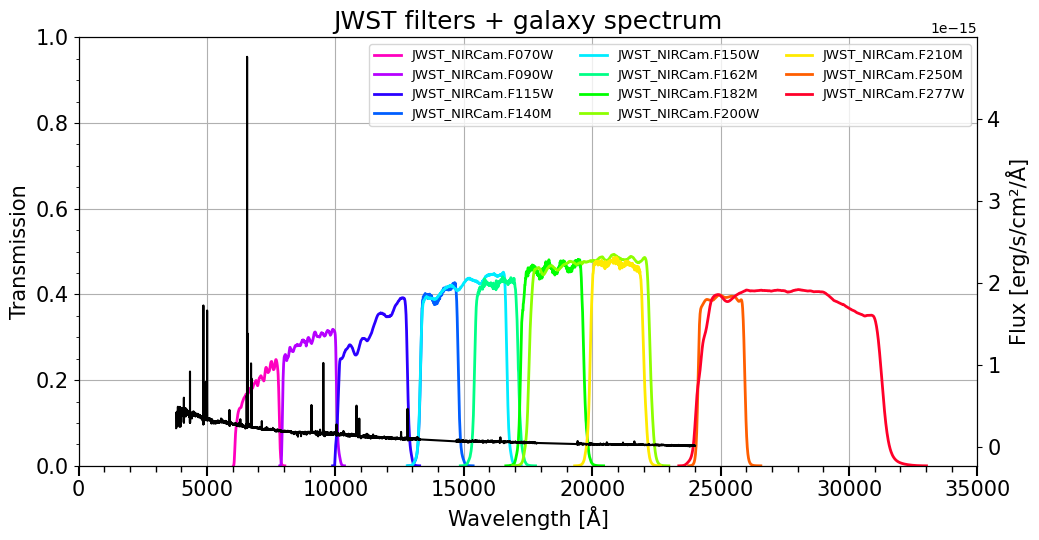

In [4]:
# Spectrum of IC4653 (Riffel+2019)
data = np.loadtxt('IC4653.spec')
w_ = data[:, 0]
f_ = data[:, 1]

# In case your file is a .csv:
# spec_df = pd.read_csv('spectrum_fsps.csv')
# w_ = spec_df['wavelength_angstrom'].values
# f_ = spec_df['flux_erg_s_cm2_A'].values

# JWST filters path
# jwst_path = 'curvas/'
# jwst_files = glob.glob(jwst_path + 'JWST_NIRCam*.dat')  
# jwst_files_sorted = sorted(jwst_files, key=wave_center)

# In case you don't want to use all the downloaded filters, but just some of them:
jwst_path = 'curvas/'
filters_selected = ['F070W', 'F090W', 'F115W', 'F140M', 'F150W', 'F162M', 'F182M', 'F200W', 'F210M', 'F250M', 'F277W']
jwst_files = []
for filters in filters_selected:
    files = glob.glob(f"{jwst_path}JWST_NIRCam.{filters}.dat")
    jwst_files.extend(files)
jwst_files_sorted = sorted(jwst_files, key=wave_center)

# Color maps
jwst_cmap = plt.get_cmap('gist_rainbow_r') 
jwst_norm = mcolors.Normalize(vmin=0, vmax=len(jwst_files_sorted)-1)

# Subplots
fig, ax1 = plt.subplots(figsize=(10.5, 5.5))

# Redshift (optional)
# z = 0.303  # Write the redshift of your object

# Transmission curves (first axis)
for i, file in enumerate(jwst_files_sorted):
    data = np.loadtxt(file)
    wavelength = data[:, 0]
    # wavelength_ = data[:, 0] / (1 + z)  # Correct the wavelength considering the redshift
    transmission = data[:, 1]
    label = file.split('/')[-1].replace('.dat', '') # the file names are like 'JWST_NIRCam.F150W.dat' so in the legend it will be JWST_NIRCam.F150W
    color = jwst_cmap(jwst_norm(i))
    ax1.plot(wavelength, transmission, label=label, color=color, lw=2)
    # ax1.plot(wavelength_, transmission, label=label, color=color, lw=2)

ax1.set_ylabel('Transmission', fontsize=15)
ax1.set_ylim(0, 1)
ax1.grid(True)
ax1.legend(ncol=3, fontsize=9.5)
ax1.set_title('JWST filters + galaxy spectrum', fontsize=18)
ax1.set_xlabel('Wavelength [Å]', fontsize=15)
# ax1.set_xlabel('Wavelength [Å], z = 0.303', fontsize=15)
ax1.set_xlim(0, 35000)

# Spectrum (second axis) 
ax2 = ax1.twinx()
ax2.plot(w_, f_, color='black', lw=1.5)
# ax2.plot(w_ * (1 + z), f_, color='black', lw=1.5)  # Correct the wavelength considering the redshift
ax2.set_ylabel(r'Flux [erg/s/cm²/Å]', fontsize=15)
ax2.tick_params(axis='y', labelcolor='black')
# ax2.set_yscale('log') 

# Ticks
ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)
ax1.minorticks_on()
ax1.tick_params(axis='x', which='minor', length=4, width=1)  
ax1.tick_params(axis='x', which='major', length=7, width=1.5)

plt.tight_layout()
plt.show()
#plt.savefig('HST_spectrum.png', dpi=200)

##### 2) This is an example to plot, in two panels, transmission curves of JWST and HST filters:

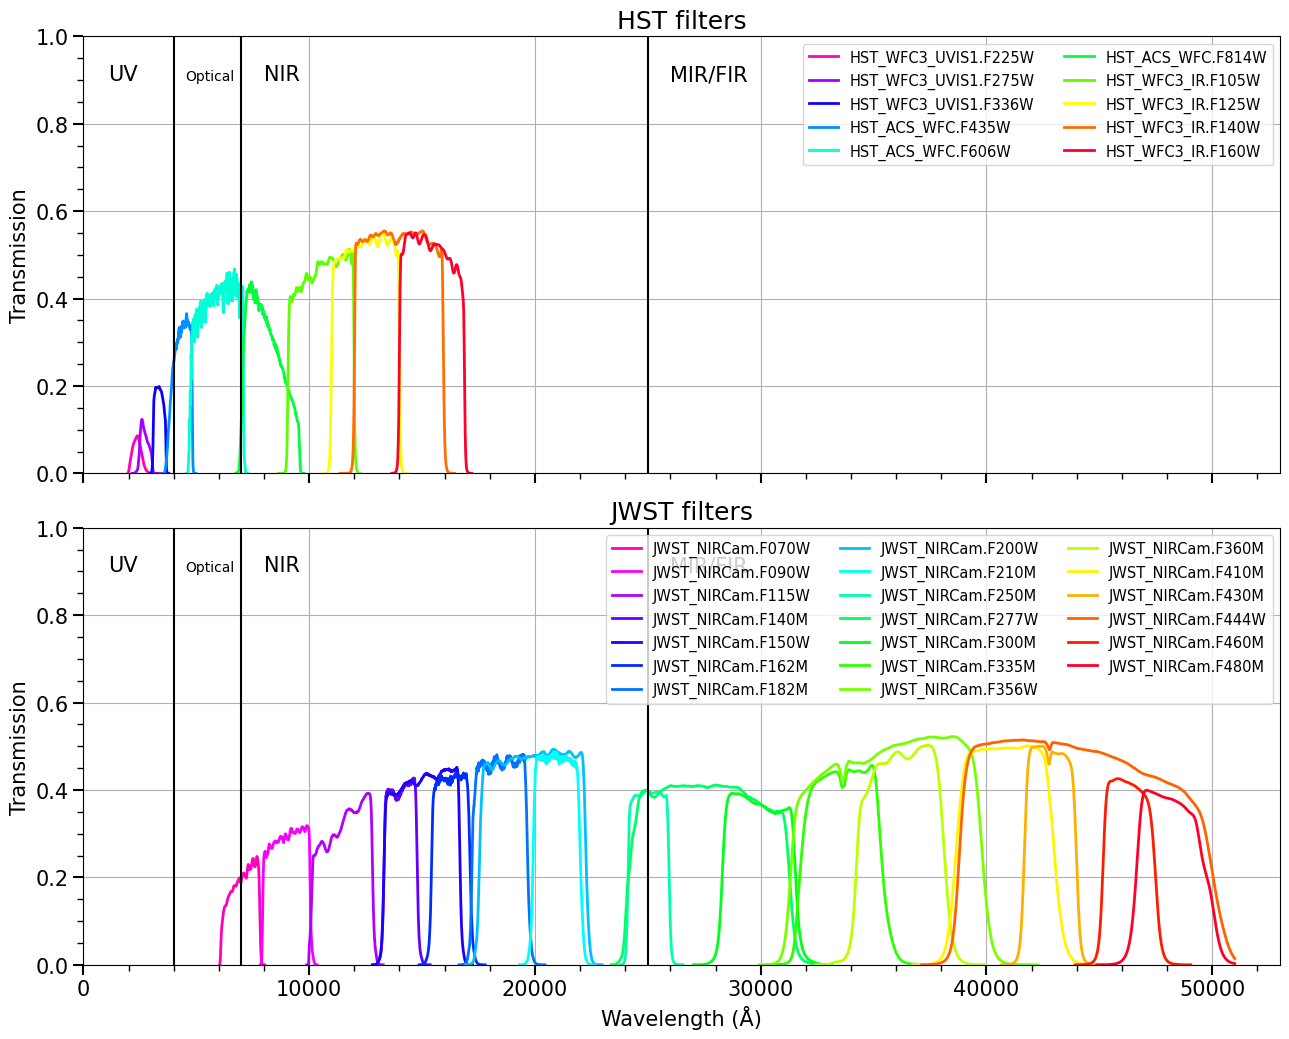

In [12]:
# HST filters path
hst_path = 'curvas/'
hst_files = glob.glob(hst_path + 'HST_*.dat')  
hst_files_sorted = sorted(hst_files, key=wave_center)

# JWST filters path
jwst_path = 'curvas/'
jwst_files = glob.glob(jwst_path + 'JWST_NIRCam*.dat')  
jwst_files_sorted = sorted(jwst_files, key=wave_center)

# Color maps
hst_cmap = plt.get_cmap('gist_rainbow_r') 
hst_norm = mcolors.Normalize(vmin=0, vmax=len(hst_files_sorted)-1)

jwst_cmap = plt.get_cmap('gist_rainbow_r') 
jwst_norm = mcolors.Normalize(vmin=0, vmax=len(jwst_files_sorted)-1)

# Subplots
fig, axs = plt.subplots(2, 1, figsize=(13, 10.5), sharex=True)

# Redshift (optional)
# z = 0.303  # Write the redshift of your object

# Plot HST filters (upper panel)
axs[0].set_title('HST filters', fontsize=18)
for i, file in enumerate(hst_files_sorted):
    data = np.loadtxt(file)
    wavelength = data[:, 0] 
    # wavelength_ = wavelength/(1+z) # Correct the wavelength considering the redshift
    transmission = data[:, 1]
    label = file.split('/')[-1].replace('.dat', '')
    color = hst_cmap(hst_norm(i))
    axs[0].plot(wavelength, transmission, label=label, color=color, lw=2)
    # axs[0].plot(wavelength_, transmission, label=label, color=color, lw=2)

axs[0].set_ylabel('Transmission', fontsize=15)
axs[0].grid(True)
axs[0].legend(ncol=2, fontsize=10.5)

# Plot JWST filters (bottom panel)
axs[1].set_title('JWST filters', fontsize=18)
for i, file in enumerate(jwst_files_sorted):
    data = np.loadtxt(file)
    wavelength = data[:, 0]
    # wavelength_ = wavelength/(1+z) # Correct the wavelength considering the redshift
    transmission = data[:, 1]
    label = file.split('/')[-1].replace('.dat', '')
    color = jwst_cmap(jwst_norm(i))
    axs[1].plot(wavelength, transmission, label=label, color=color, lw=2)
    # axs[1].plot(wavelength_, transmission, label=label, color=color, lw=2)

axs[1].set_xlabel('Wavelength (Å)', fontsize=15)
# axs[1].set_xlabel('Wavelength (Å), z = 0.303', fontsize=15)
axs[1].set_ylabel('Transmission', fontsize=15)
axs[1].grid(True)
axs[1].legend(ncol=3, fontsize=10.5)

# Limits
axs[1].set_xlim(0, 53000)
axs[1].set_ylim(0, 1)
axs[0].set_ylim(0, 1)

# Ticks
for ax in axs:
    ax.tick_params(labelsize=15)
    ax.minorticks_on()
    ax.tick_params(axis='x', which='minor', length=4, width=1)  
    ax.tick_params(axis='x', which='major', length=7, width=1.5)
    ax.tick_params(axis='y', which='minor', length=4, width=1)  
    ax.tick_params(axis='y', which='major', length=7, width=1.5)
    
    # Lines marking the electromagnetic spectrum ranges (optional)
    ax.vlines(4000, 0, 1, colors='black')
    ax.vlines(7000, 0, 1, colors='black')
    ax.vlines(25000, 0, 1, colors='black')
    ax.annotate('UV', xy=(1100, 0.9), fontsize=15, color='black')
    ax.annotate('Optical', xy=(4500, 0.9), fontsize=10, color='black')
    ax.annotate('NIR', xy=(8000, 0.9), fontsize=15, color='black')
    ax.annotate('MIR/FIR', xy=(26000, 0.9), fontsize=15, color='black')

plt.tight_layout()
plt.show()
# plt.savefig('HST_JWST.png', dpi=200)

##### 3) This is an example to plot the FWHM of JWST and HST filters:

'all_filters_jwst_hst_restframe.csv' and 'emission_lines.csv' were created based on data from the filters on the SVO website. Please contact the author of these codes/notebook if you need the files.

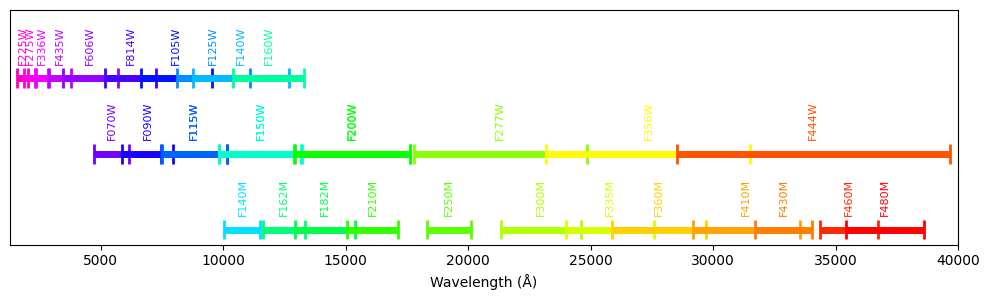

In [17]:
# Filters dataframe (columns: filter, instrument, λ_cen_obs_A,	width_eff_A, FWHM_A, λ_min_obs_A, λ_max_obs_A, range)
df_filters = pd.read_csv('all_filters_jwst_hst_restframe.csv') 

# Create lines
df_filters['y_bar'] = 1.2
df_filters.loc[df_filters['Instrument'].str.contains('HST'), 'y_bar'] = 2.2

df_filters.loc[(df_filters['Instrument'] == 'JWST/NIRCam') &
df_filters['Filter'].str.endswith('M'), 'y_bar'] = 0.2
  
# Color map  
cmap = plt.get_cmap('gist_rainbow_r')
colors = [cmap(i / len(df_filters)) for i in range(len(df_filters))]

# Plot
fig, ax = plt.subplots(figsize=(10, 3.1))

for i, row in df_filters.iterrows():
    λ_c = row['λ_cen_obs_A']
    fwhm = row['FWHM_A']  # You can replace it with the column 'width_eff_A'
    filters = row['Filter']
    colors_ = colors[i]
    y_bar = row['y_bar']
    y_tick_size = 0.13

    start = λ_c - fwhm/2
    end = λ_c + fwhm/2

    ax.hlines(y=y_bar, xmin=start, xmax=end, colors=colors_, linewidth=5)
    ax.vlines([start, end], ymin=y_bar - y_tick_size, ymax=y_bar + y_tick_size,
              colors=colors_, linewidth=2)
    ax.text(λ_c, y_bar + 0.18, filters, ha='center', va='bottom', color=colors_,
            fontsize=8, rotation=90)

ax.set_ylim(0, 3.1)
ax.set_xlim(1300, 40000)
ax.set_xlabel('Wavelength (Å)')
ax.set_yticks([])
plt.tight_layout()
plt.show()
# plt.savefig('HST_JWST_FWHM.png')

##### 4) This is an example to plot transmission curves of JWST and HST filters and the localization of emission lines:

In [6]:
# Emission lines dataframe with name and wavelengths
emission_lines = 'emission_lines.csv' # emission lines wavelengths from Riffel+2019
df_lines = pd.read_csv(emission_lines)

In [7]:
df_lines

,wavelength,line
0,1215,Lyα
1,1909,[C III]
2,3726,[O II]
3,3729,[O II]
4,3760,[Fe VII]
5,3869,[Ne III]
6,4340,Hγ
7,4102,Hδ
8,4686,He II
9,6300,[O I]


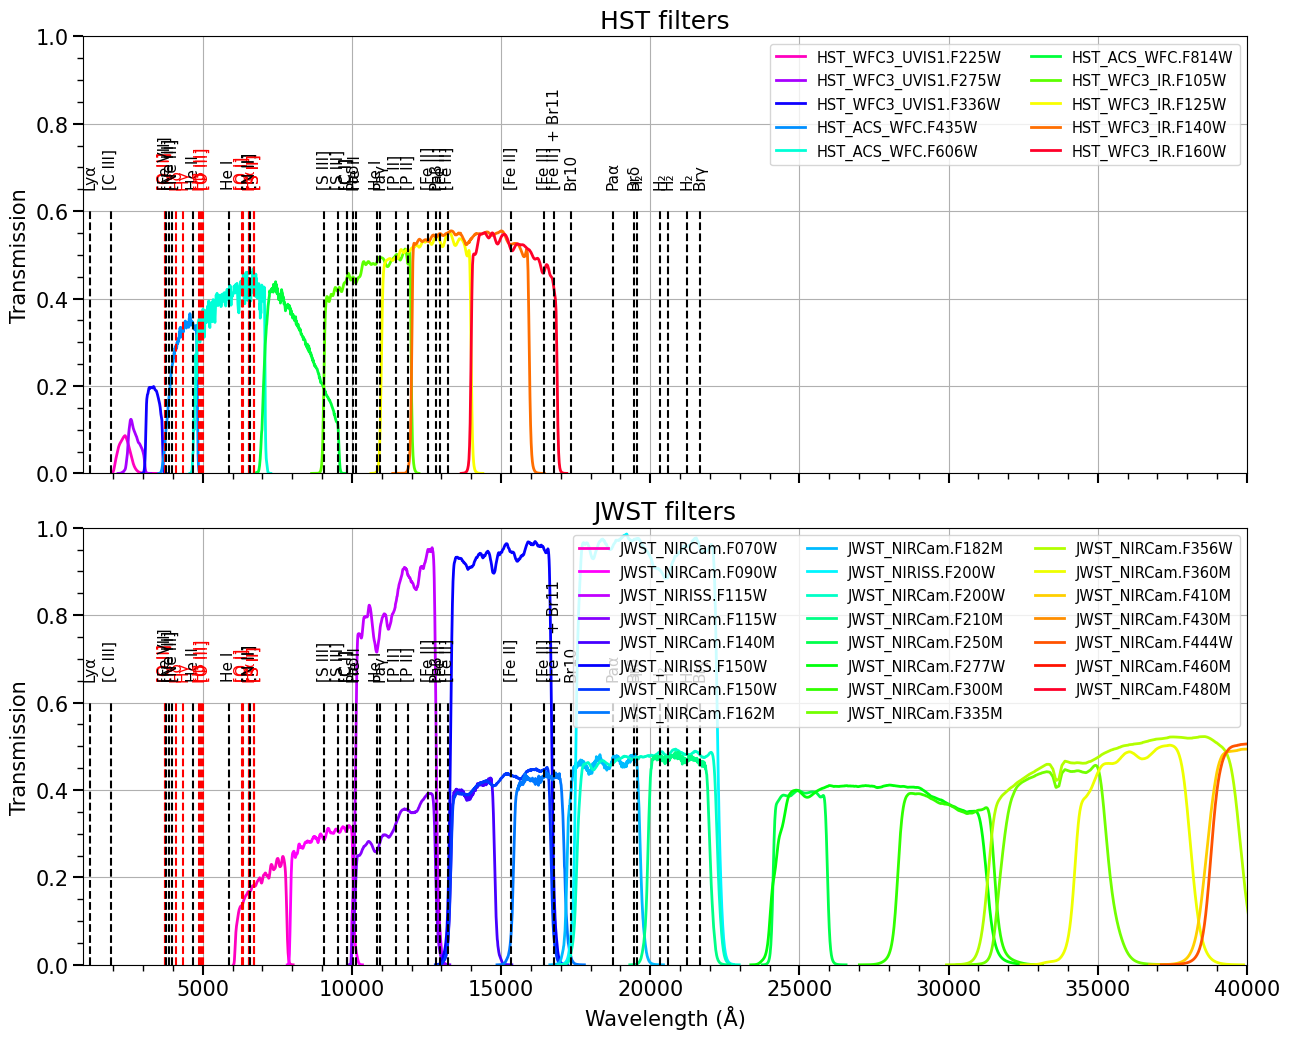

In [11]:
# %matplotlib widget 

# Redshift (optional)
# z = 0.303  # Write the redshift of your object
# df_lines["wavelength_z"] = df_lines["wavelength"]*(1+z)  # Correct the wavelength considering the redshift

lines_selected = ['[O II]','Hγ','Hδ','Hβ','[O III]','[O I]','Hα','[S II]'] # If you want to highlight some emission lines (optional)

# HST filters path
hst_path = 'curvas/'
hst_files = glob.glob(hst_path + 'HST_*.dat')  
hst_files_sorted = sorted(hst_files, key=wave_center)

# JWST filters path
jwst_path = 'curvas/'
jwst_files = glob.glob(jwst_path + 'JWST_*.dat')  
jwst_files_sorted = sorted(jwst_files, key=wave_center)

# Color maps
hst_cmap = plt.get_cmap('gist_rainbow_r') 
hst_norm = mcolors.Normalize(vmin=0, vmax=len(hst_files_sorted)-1)

jwst_cmap = plt.get_cmap('gist_rainbow_r') 
jwst_norm = mcolors.Normalize(vmin=0, vmax=len(jwst_files_sorted)-1)

# Subplots
fig, axs = plt.subplots(2, 1, figsize=(13, 10.5), sharex=True)

# Plot HST filters (upper panel)
axs[0].set_title('HST filters', fontsize=18)
for i, file in enumerate(hst_files_sorted):
    data = np.loadtxt(file)
    wavelength = data[:, 0] 
    # wavelength_ = wavelength/(1+z) # Correct the wavelength considering the redshift
    transmission = data[:, 1]
    label = file.split('/')[-1].replace('.dat', '')
    color = hst_cmap(hst_norm(i))
    axs[0].plot(wavelength, transmission, label=label, color=color, lw=2)
    # axs[0].plot(wavelength_, transmission, label=label, color=color, lw=2)

axs[0].set_ylabel('Transmission', fontsize=15)
axs[0].grid(True)
axs[0].legend(ncol=2, fontsize=10.5)

# Plot JWST filters (bottom panel)
axs[1].set_title('JWST filters', fontsize=18)
for i, file in enumerate(jwst_files_sorted):
    data = np.loadtxt(file)
    wavelength = data[:, 0]
    # wavelength_ = wavelength/(1+z) # Correct the wavelength considering the redshift
    transmission = data[:, 1]
    label = file.split('/')[-1].replace('.dat', '')
    color = jwst_cmap(jwst_norm(i))
    axs[1].plot(wavelength, transmission, label=label, color=color, lw=2)
    # axs[1].plot(wavelength_, transmission, label=label, color=color, lw=2)

axs[1].set_xlabel('Wavelength (Å)', fontsize=15)
# axs[1].set_xlabel('Wavelength (Å), z = 0.303', fontsize=15)
axs[1].set_ylabel('Transmission', fontsize=15)
axs[1].grid(True)
axs[1].legend(ncol=3, fontsize=10.5)

# Limits
axs[1].set_xlim(1000, 40000)
axs[1].set_ylim(0, 1)
axs[0].set_ylim(0, 1)

for ax in axs:
    # lines_plot = set() # If you don't want the lines to repeat (the lines of some doublets are very close together)
    
    # Ticks
    ax.tick_params(labelsize=15)
    ax.minorticks_on()
    ax.tick_params(axis='x', which='minor', length=4, width=1)  
    ax.tick_params(axis='x', which='major', length=7, width=1.5)
    ax.tick_params(axis='y', which='minor', length=4, width=1)  
    ax.tick_params(axis='y', which='major', length=7, width=1.5)

    # Plot emission lines
    for _, row in df_lines.iterrows():
        wavelength = row['wavelength']
        # wavelength = row['wavelength_z']
        name = row['line']

       # if name not in lines_plot:  # If you don't want the lines to repeat (the lines of some doublets are very close together)
        color_ = 'red' if name in lines_selected else 'black' 
            
        ax.vlines(wavelength, 0, 0.6, color=color_, linestyle='--')

	# Annotate names of emission lines 
        offset = 5 if i % 2 == 0 else -10 
        ax.annotate(
            name,
            xy=(wavelength, 0.6),
            xytext=(wavelength, 0.65),
            textcoords='data',
            rotation=90,
            ha='center',
            va='bottom' if offset > 0 else 'top',
            fontsize=11,
            color=color_)
        
            # lines_plot.add(name)  # If you don't want the lines to repeat (the lines of some doublets are very close together)

plt.tight_layout()
plt.show()
# plt.savefig('HST_JWST_emission_lines.png')

##### 5) This is an example to check which filters emission lines are:

In [18]:
# Emission lines dataframe (columns: line, wavelength)
emission_lines = 'emission_lines.csv' # emission lines wavelengths from Riffel+2019
df_lines = pd.read_csv(emission_lines)

# Filters dataframe (columns: filter, instrument, λ_cen_obs_A,	width_eff_A, FWHM_A, λ_min_obs_A, λ_max_obs_A, range)
df_filters = pd.read_csv("all_filters_jwst_hst_restframe.csv")

# Redshift 
z = 0.303  # Write the redshift of your object
df_lines["wavelength_z"] = df_lines["wavelength"]*(1+z)  # Correct the wavelength considering the redshift

# Checks in which filter a emission line is
matches = []

for i, row in df_lines.iterrows():
    line = row['line']
    λ_emission = row['wavelength_z']

    for j, filters in df_filters.iterrows():
        if filters['λ_min_obs_A'] <= λ_emission <= filters['λ_max_obs_A']:
            matches.append({
                'Line': line,
                'λ_emission_A': λ_emission,
                'Filter': filters['Filter'],
                'Instrument': filters['Instrument'],
                'Range': filters['range']})

# Final dataframe
df_lines_filters = pd.DataFrame(matches)
df_lines_filters = df_lines_filters.sort_values(by="λ_emission_A")
# df_lines_filters.to_csv("lines_filters.csv", index=False)

In [19]:
df_lines_filters

,Line,λ_emission_A,Filter,Instrument,Range
0,Lyα,1583.145,F225W,HST/WFC3,UV
1,[C III],2487.427,F336W,HST/WFC3,UV
2,[O II],4854.978,F606W,HST/ACS,Optical
3,[O II],4854.978,F070W,JWST/NIRCam,Optical
4,[O II],4858.887,F606W,HST/ACS,Optical
...,...,...,...,...,...
121,H₂,27647.054,F335M,JWST/NIRCam,MIR/FIR
122,H₂,27647.054,F356W,JWST/NIRCam,MIR/FIR
123,H₂,27647.054,F360M,JWST/NIRCam,MIR/FIR
124,Brγ,28215.162,F356W,JWST/NIRCam,MIR/FIR
